{'data_root': '/home/data',
 'deepmatch': '/home/deepmatching_1.2.2_c++/deepmatching-static'}


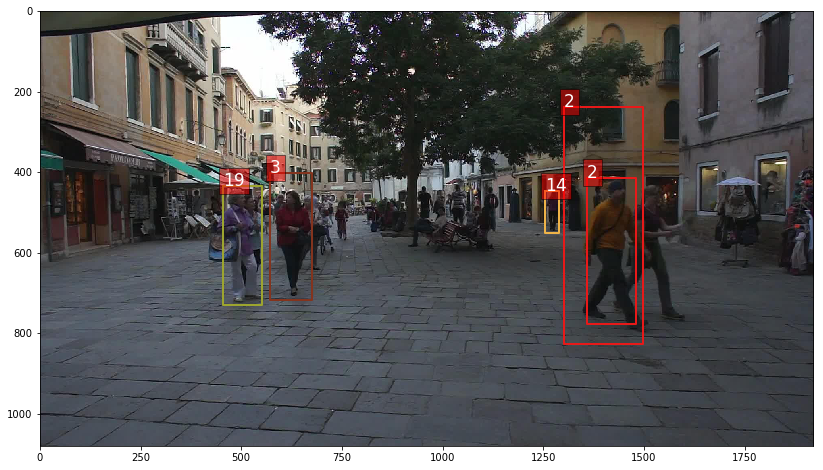

In [1]:
%matplotlib inline
import json
from pppr import aabb
from pprint import pprint
Settings = json.load(open('settings.txt'))
pprint(Settings)
import sys
sys.path.insert(0,'../')
from pak.datasets.MOT import MOT16
from pak import utils
import matplotlib.pyplot as plt
import numpy as np

root = Settings['data_root']

from experiments import MOT16_Experiments

mot16 = MOT16_Experiments(root)

fig = plt.figure(figsize=(16,8))

mot16.plot_frame_MOT16_02(fig.add_subplot(111), 1)


plt.show()

In [13]:
from pak.utils import extract_eq
from pppr import aabb
from scipy.optimize import linear_sum_assignment

def evaluate(G, Hy, T):
    LARGE = 9999999
    max_frame = np.max(G[:,0])
    min_frame = np.min(G[:,0])
    for frame in range(min_frame, max_frame+1):
        O = extract_eq(G, col=0, value=frame)
        H = extract_eq(Hy, col=0, value=frame)
        
        #print(H)
        
        C_ij = np.ones((len(O), len(H))) * LARGE
        
        for i,o in enumerate(list(O)):
            bb_o = o[2:]
            for j,h in enumerate(list(H)):
                bb_h = h[2:]
                dist = aabb.dist(bb_o, bb_h)
                C_ij[i,j] = dist
        
        row_ind, col_ind = linear_sum_assignment(C_ij)
        print(row_ind, col_ind)
        
    
    
Gt = np.array([
            [1, 1, 10, 10, 10, 10],
            [1, 2, 20, 20, 10, 10],
            [2, 1, 10, 10, 10, 10],
            [3, 1, 10, 10, 10, 10],
            [4, 1, 10, 10, 10, 10],
            [5, 1, 10, 10, 10, 10]
        ])

Hy = np.array([
            [1, 2, 20, 20, 10, 10],      
            [1, 1, 10, 10, 10, 10],
            [2, 1, 10, 10, 10, 10],
            [3, 1, 10, 10, 10, 10],
            [4, 1, 10, 10, 10, 10],
            [5, 1, 10, 10, 10, 10]
        ])


evaluate(Gt, Hy, 10)

[0 1] [1 0]
[0] [0]
[0] [0]
[0] [0]
[0] [0]
